# Proyecto analítica de textos

 ### Instalación e importanción de librerías

In [44]:
!pip install ftfy

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import ftfy
from wordcloud import WordCloud

In [46]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
def preprocess_text(text):
    # Corregir problemas de codificación con ftfy
    text = ftfy.fix_text(text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números, pero mantener espacios
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [48]:
# Cargar los datos
data = pd.read_excel('data_train.xlsx')

In [49]:
# Aplicar ftfy a la columna 'Textos_espanol'
data['Textos_espanol'] = data['Textos_espanol'].apply(ftfy.fix_text)

In [50]:
# Aplicar preprocesamiento a la columna de texto
data['texto_preprocesado'] = data['Textos_espanol'].apply(preprocess_text)

In [51]:
# Eliminar filas con texto preprocesado vacío
data_cleaned = data[data['texto_preprocesado'] != '']

In [52]:
# Imprimir información sobre el preprocesamiento
print(f"Número de filas antes del preprocesamiento: {len(data)}")
print(f"Número de filas después del preprocesamiento: {len(data_cleaned)}")
print("\nPrimeras filas después del preprocesamiento:")
print(data_cleaned[['texto_preprocesado']].head())

Número de filas antes del preprocesamiento: 4049
Número de filas después del preprocesamiento: 4049

Primeras filas después del preprocesamiento:
                                  texto_preprocesado
0  ejemplo número consulta externa especialista c...
1  gobierno central financió directament solo gas...
2  clarament factor juego particular variedad bar...
3  ejemplo australiano victoria creó agencia prom...
4  consumo anual alcohol estima litro año hombr e...


### Perfilamiento y entendimiento de los datos

In [53]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_cleaned['texto_preprocesado']
y = data_cleaned['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [55]:
# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [56]:
# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [57]:
print("Dimensiones de los datos de entrenamiento:", X_train_tfidf.shape)
print("Dimensiones de los datos de prueba:", X_test_tfidf.shape)

Dimensiones de los datos de entrenamiento: (3239, 5000)
Dimensiones de los datos de prueba: (810, 5000)


In [58]:
# Crear y entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [59]:
# Realizar predicciones
y_pred = nb_model.predict(X_test_tfidf)

In [60]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

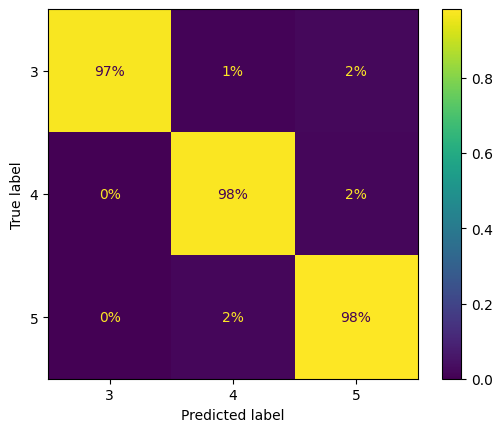

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.show

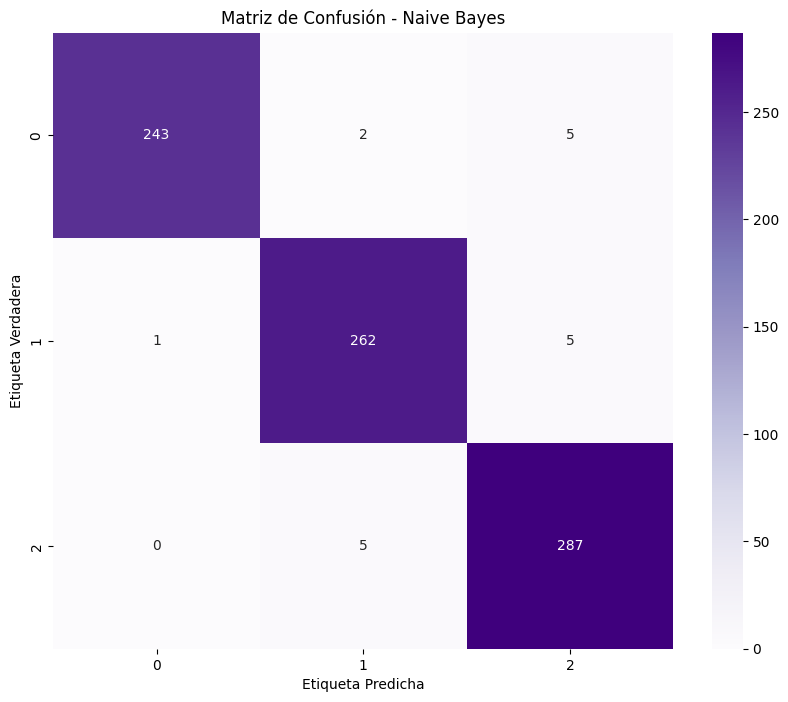

In [62]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [63]:
# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))


Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      0.97      0.98       250
           4       0.97      0.98      0.98       268
           5       0.97      0.98      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



In [64]:
# Calcular y mostrar el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nF1-score (ponderado): {f1:.4f}")


F1-score (ponderado): 0.9778


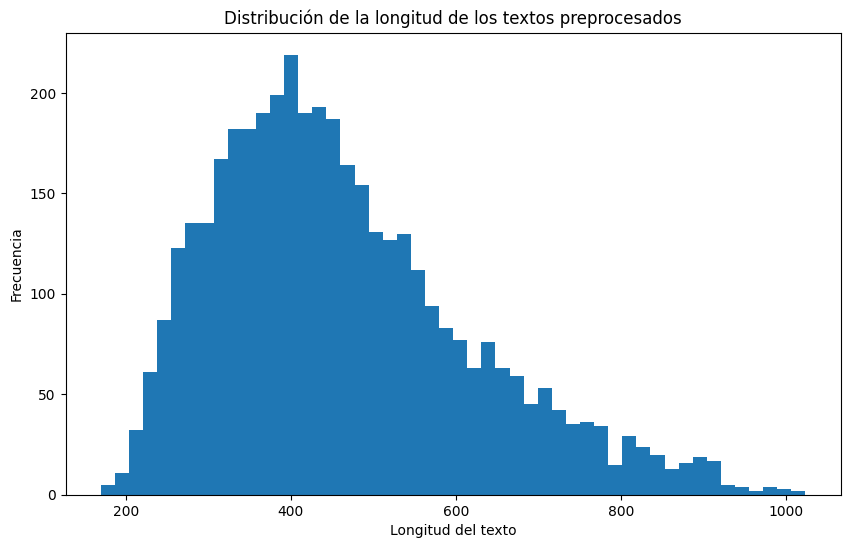

In [65]:
# Visualización de la longitud de los textos
plt.figure(figsize=(10, 6))
data_cleaned['longitud_texto'] = data_cleaned['texto_preprocesado'].apply(len)
plt.hist(data_cleaned['longitud_texto'], bins=50)
plt.title('Distribución de la longitud de los textos preprocesados')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

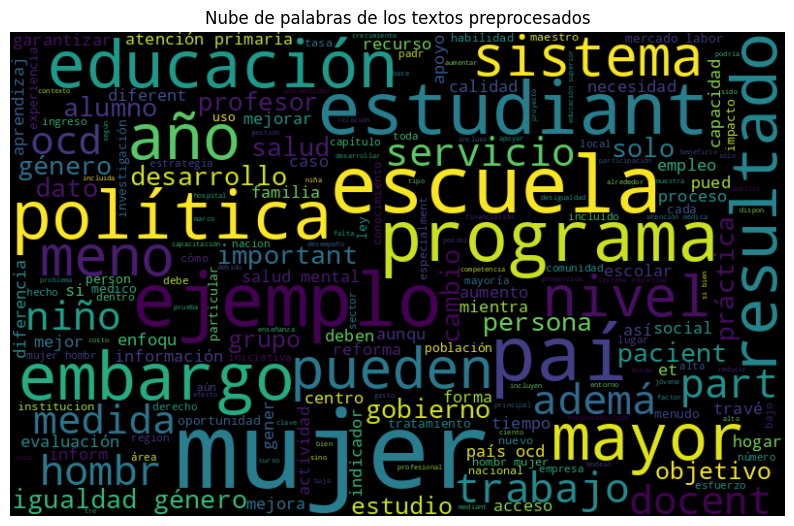

In [66]:
# Nube de palabras de los textos preprocesados
all_words = ' '.join(data_cleaned['texto_preprocesado'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras de los textos preprocesados')
plt.show()

In [67]:
print("\nDistribución de etiquetas:")
print(data_cleaned['sdg'].value_counts(normalize=True))


Distribución de etiquetas:
sdg
5    0.358360
4    0.334404
3    0.307236
Name: proportion, dtype: float64


### Carga de datos sin etiquetas para predicciones

In [68]:
data_test = pd.read_excel('/content/data_test.xlsx')

In [69]:
# Preprocesar los datos sin etiquetas
data_test['texto_preprocesado'] = data_test['Textos_espanol'].apply(preprocess_text)

In [70]:
# Aplicar ftfy a la columna 'Textos_espanol'
data_test['Textos_espanol'] = data_test['Textos_espanol'].apply(ftfy.fix_text)

In [71]:
# Vectorizar los datos sin etiquetas
X_data_test_tfidf = tfidf_vectorizer.transform(data_test['texto_preprocesado'])

In [72]:
# Eliminar filas con texto preprocesado vacío
data_test_cleaned = data_test[data_test['texto_preprocesado'] != '']

In [73]:
# Realizar predicciones en los datos de prueba
test_predictions = nb_model.predict(X_data_test_tfidf)

In [74]:
# Añadir las predicciones al DataFrame de datos de prueba
data_test['prediccion_sdg'] = test_predictions

In [75]:
# Mostrar las primeras filas de los datos de prueba con sus predicciones
print("\nPredicciones para datos de prueba adicionales:")
print(data_test[['Textos_espanol', 'prediccion_sdg']].head(10))


Predicciones para datos de prueba adicionales:
                                      Textos_espanol  prediccion_sdg
0   Han examinado la contribución de las universi...               4
1  En la última década, y en particular desde 201...               3
2  ¿En qué países los estudiantes de alto rendimi...               4
3  A raíz de su preocupación por el hecho de que ...               3
4  1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...               4
5  A continuación, se propone una síntesis de paí...               4
6  A diferencia de los acuerdos anteriores, la nu...               4
7  Por ejemplo, los servicios de urgencias tienen...               3
8  A lo largo de diez años cerraron escuelas espe...               4
9  A medida que se implemente la nueva estructura...               4


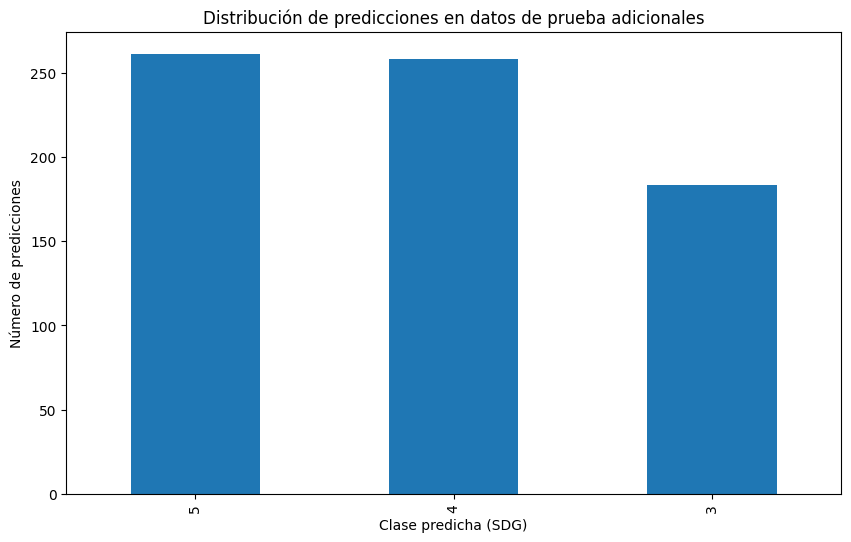

In [76]:
# Visualizar la distribución de las predicciones
plt.figure(figsize=(10, 6))
data_test['prediccion_sdg'].value_counts().plot(kind='bar')
plt.title('Distribución de predicciones en datos de prueba adicionales')
plt.xlabel('Clase predicha (SDG)')
plt.ylabel('Número de predicciones')
plt.show()


In [77]:
# Calcular y mostrar las probabilidades de las predicciones
prediction_probs = nb_model.predict_proba(X_data_test_tfidf)

In [78]:
# Añadir la probabilidad máxima (confianza de la predicción) al DataFrame
data_test['confianza_prediccion'] = prediction_probs.max(axis=1)

In [79]:
# Mostrar las primeras filas con predicciones y confianza
print("\nPredicciones y confianza para datos de prueba:")
print(data_test[['Textos_espanol', 'prediccion_sdg', 'confianza_prediccion']].head(10))


Predicciones y confianza para datos de prueba:
                                      Textos_espanol  prediccion_sdg  \
0   Han examinado la contribución de las universi...               4   
1  En la última década, y en particular desde 201...               3   
2  ¿En qué países los estudiantes de alto rendimi...               4   
3  A raíz de su preocupación por el hecho de que ...               3   
4  1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...               4   
5  A continuación, se propone una síntesis de paí...               4   
6  A diferencia de los acuerdos anteriores, la nu...               4   
7  Por ejemplo, los servicios de urgencias tienen...               3   
8  A lo largo de diez años cerraron escuelas espe...               4   
9  A medida que se implemente la nueva estructura...               4   

   confianza_prediccion  
0              0.727701  
1              0.858410  
2              0.961567  
3              0.971135  
4              0.975415  
5  

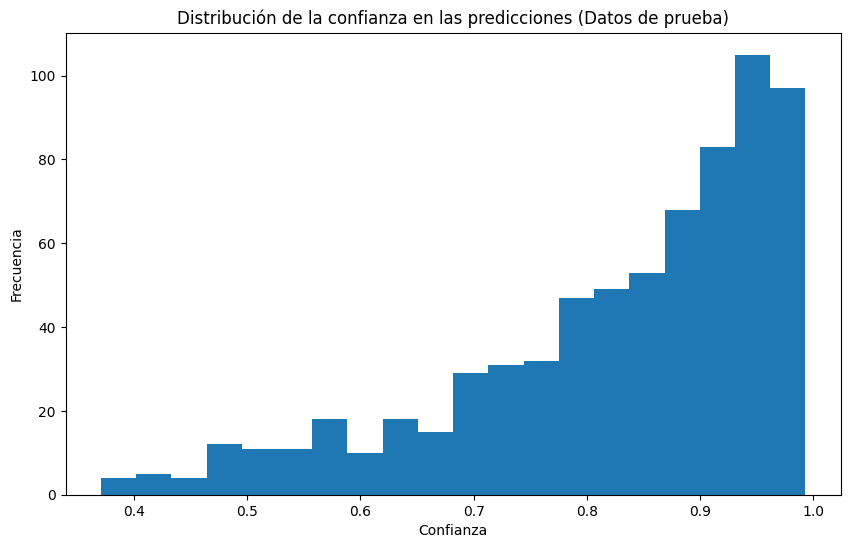

In [80]:
# Visualizar la distribución de la confianza de las predicciones
plt.figure(figsize=(10, 6))
plt.hist(data_test['confianza_prediccion'], bins=20)
plt.title('Distribución de la confianza en las predicciones (Datos de prueba)')
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.show()

In [81]:
# Exportar el DataFrame a un archivo Excel
output_filename = 'predicciones_con_sdg.xlsx'
data_test.to_excel(output_filename, index=False)

print(f"Archivo exportado exitosamente como {output_filename}")

Archivo exportado exitosamente como predicciones_con_sdg.xlsx


In [82]:
# Obtener las características más importantes para cada clase
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, category in enumerate([3, 4, 5]):  # ODS 3, 4, 5
    top_features = np.argsort(nb_model.feature_log_prob_[i])[-20:]  # Top 20 características
    print(f"\nTop 20 palabras más relevantes para ODS {category}:")
    for idx in reversed(top_features):
        print(f"{feature_names[idx]}: {nb_model.feature_log_prob_[i][idx]:.4f}")


Top 20 palabras más relevantes para ODS 3:
salud: -4.9368
atención: -5.1511
servicio: -5.6556
pacient: -5.7471
mental: -5.7836
enfermedad: -5.8735
médico: -5.9508
sistema: -6.0818
país: -6.1513
año: -6.1843
persona: -6.1861
primaria: -6.1863
calidad: -6.2381
tratamiento: -6.2783
sanitario: -6.2871
gasto: -6.2984
mortalidad: -6.3441
médica: -6.3878
ocd: -6.3919
tasa: -6.4007

Top 20 palabras más relevantes para ODS 4:
escuela: -5.1310
educación: -5.1640
estudiant: -5.2724
docent: -5.5242
escolar: -5.6420
aprendizaj: -5.6653
alumno: -5.8286
evaluación: -5.9252
superior: -5.9791
profesor: -6.0111
programa: -6.0184
ocd: -6.0788
nivel: -6.0896
formación: -6.1146
enseñanza: -6.1220
año: -6.1244
sistema: -6.1308
educativo: -6.1421
habilidad: -6.1784
niño: -6.2109

Top 20 palabras más relevantes para ODS 5:
mujer: -4.4916
género: -4.9474
hombr: -5.5670
igualdad: -5.7745
derecho: -5.8125
trabajo: -5.8874
política: -5.9856
violencia: -6.0706
país: -6.1109
social: -6.1946
niña: -6.2496
labor: -6

In [93]:
# Analizar muestras mal clasificadas
misclassified_indices = np.where(y_test != y_pred)[0]
print("\nEjemplos de textos mal clasificados:")
for i in range(min(5, len(misclassified_indices))):  # Mostrar hasta 5 ejemplos, o la longitud de misclassified_indices si es menor
    idx = misclassified_indices[i] # Obtener el índice real de X_test
    if not isinstance(X_test.iloc[idx], str): # Check if the value is not a string
        original_text = ' '.join([feature_names[j] for j in X_test.iloc[idx].nonzero()[1]]) #Usar iloc para acceder al índice
    else:
        original_text = X_test.iloc[idx] # If it's a string, just use the string value
    print(f"\nTexto original: {original_text}")
    print(f"Etiqueta verdadera: ODS {y_test.iloc[idx]}") #Usar iloc para acceder al índice
    print(f"Etiqueta predicha: ODS {y_pred[idx]}")


Ejemplos de textos mal clasificados:

Texto original: tema sido destacado red igualdad género comité asistencia desarrollo cad ocd referencia cuestion género consagrada declaración parí eficacia ayuda desarrollo agenda acción accra ocd b estudio diferencia género desempeño estudiant año presentado evidencia diferent forma niño niña aprenden progresan educación ocd estudio equidad educación analizado política mejorar desempeño estudiant diferent grupo relevant estudiar cómo instalacion educativa pueden atend diferencia género mejorar rendimiento
Etiqueta verdadera: ODS 5
Etiqueta predicha: ODS 4

Texto original: pued contribuir solo cada diez reforma país ocd vaya seguida algún intento evaluar impacto ocd solo difícil coordinar desarrollo política distinto nivel gobierno sino vincular perspectiva diferent departamento gubernamental embargo educación desarrol largo toda vida necesario implicar amplio abanico ámbito político educación familia empleo desarrollo industri económico migració

In [89]:
# Distribución de predicciones
print("\nDistribución de predicciones:")
print(pd.Series(y_pred).value_counts(normalize=True))


Distribución de predicciones:
5    0.366667
4    0.332099
3    0.301235
Name: proportion, dtype: float64
